In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model="llama-3.3-70b-versatile")
llm_groq.invoke("hi I am sachchida. I am AI enthusiast")

AIMessage(content="Hi Sachchida, nice to meet you. That's great to hear that you're an AI enthusiast. Artificial Intelligence is a fascinating field with endless possibilities and applications. What aspects of AI interest you the most? Are you more into machine learning, natural language processing, computer vision, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 46, 'total_tokens': 108, 'completion_time': 0.165454335, 'prompt_time': 0.002137349, 'queue_time': 0.054589411, 'total_time': 0.167591684}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--3aa14bbe-74f3-4568-b361-bf668930d494-0', usage_metadata={'input_tokens': 46, 'output_tokens': 62, 'total_tokens': 108})

In [3]:
import os
os.environ["USER_AGENT"] = "LangChainApp/1.0"

In [4]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter


In [5]:
urls=[
    "https://academy.langchain.com/courses/intro-to-langgraph",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraphjs/how-tos/map-reduce/"
]

In [6]:
docs=[WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://academy.langchain.com/courses/intro-to-langgraph', 'title': 'Foundation: Introduction to LangGraph', 'description': 'Learn the basics of LangGraph - our framework for building agentic and multi-agent applications. Separate from the LangChain package, LangGraph helps developers add better precision and control into agentic workflows.', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFoundation: Introduction to LangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDocs\n\n\n\n\n\n\nPython\n\nLangChain\nLangSmith\nLangGraph\n\n\n\nJavaScript\n\nLangChain\nLangSmith\nLangGraph\n\n\n\n\nCommunity\nLangSmith\nAll Courses\n\n\nSign In\n\n\nRegister\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLangChain Academy\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFoundation: Introduction to LangGraph\nLearn the basics of LangGraph - our framework for bui

In [7]:
doc_list=[item for sublist in docs for item in sublist]
print(doc_list)
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=100)

doc_splits=text_splitter.split_documents(doc_list)
print(doc_splits[:2])

[Document(metadata={'source': 'https://academy.langchain.com/courses/intro-to-langgraph', 'title': 'Foundation: Introduction to LangGraph', 'description': 'Learn the basics of LangGraph - our framework for building agentic and multi-agent applications. Separate from the LangChain package, LangGraph helps developers add better precision and control into agentic workflows.', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFoundation: Introduction to LangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDocs\n\n\n\n\n\n\nPython\n\nLangChain\nLangSmith\nLangGraph\n\n\n\nJavaScript\n\nLangChain\nLangSmith\nLangGraph\n\n\n\n\nCommunity\nLangSmith\nAll Courses\n\n\nSign In\n\n\nRegister\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLangChain Academy\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFoundation: Introduction to LangGraph\nLearn the basics of LangGraph - our framework for buil

In [8]:
vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)
retriever=vectorstore.as_retriever()

In [9]:
retriever.invoke("what is langgraph")

[Document(id='632ae130-e85c-4928-a695-22eb8c25afd2', metadata={'source': 'https://academy.langchain.com/courses/intro-to-langgraph', 'title': 'Foundation: Introduction to LangGraph', 'description': 'Learn the basics of LangGraph - our framework for building agentic and multi-agent applications. Separate from the LangChain package, LangGraph helps developers add better precision and control into agentic workflows.', 'language': 'en'}, page_content='No. LangGraph is an orchestration framework for complex agentic systems and is more low-level and controllable than LangChain agents. On the other hand, LangChain provides a standard interface to interact with models and other components, useful for straight-forward chains and retrieval flows.\n\n\n\n\n\n\n\n                      How is LangGraph different from other agent frameworks?\n                    \n\nOther agentic frameworks can work for simple, generic tasks but fall short for complex tasks bespoke to a company’s needs. LangGraph pr

In [10]:
## Retriever to Retriever tools

from langchain.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(
    retriever,
    "retriver_vector_db_blog",
    "search and run information about langgraph"
)

In [11]:
### Langchain Blogs create a seperate vector db
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/how_to/qa_chat_history_how_to/"
]
langchain_docs=[WebBaseLoader(url).load() for url in urls]
langchain_docs

doc_list_langchain=[item for sublist in langchain_docs for item in sublist]
print(doc_list_langchain)
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=100)

doc_splits_langchain=text_splitter.split_documents(doc_list_langchain)
print(doc_splits_langchain[:2])

vectorstore_langchain=FAISS.from_documents(
    documents=doc_splits_langchain,
    embedding=OpenAIEmbeddings()
)
retriever_langchain=vectorstore.as_retriever()

[Document(metadata={'source': 'https://academy.langchain.com/courses/intro-to-langgraph', 'title': 'Foundation: Introduction to LangGraph', 'description': 'Learn the basics of LangGraph - our framework for building agentic and multi-agent applications. Separate from the LangChain package, LangGraph helps developers add better precision and control into agentic workflows.', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFoundation: Introduction to LangGraph\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDocs\n\n\n\n\n\n\nPython\n\nLangChain\nLangSmith\nLangGraph\n\n\n\nJavaScript\n\nLangChain\nLangSmith\nLangGraph\n\n\n\n\nCommunity\nLangSmith\nAll Courses\n\n\nSign In\n\n\nRegister\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLangChain Academy\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFoundation: Introduction to LangGraph\nLearn the basics of LangGraph - our framework for buil

In [12]:
retriever_tool_langchain=create_retriever_tool(
    retriever_langchain,
    "retriver_vector_langchain_blog",
    "search and run information about langchain"
)

In [13]:
tools=[retriever_tool,retriever_tool_langchain]

### Langgraph workflow

In [14]:
from typing import Annotated,Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    ### the add_message function defines how an update should be processed
    # Default is to replace add_message says append
    messages: Annotated[Sequence[BaseMessage],add_messages]

In [15]:
llm_groq
llm_groq.invoke("hi how r u")

AIMessage(content="I'm doing well, thanks for asking. I'm a large language model, so I don't have feelings or emotions like humans do, but I'm always happy to chat and help with any questions or topics you'd like to discuss. How about you? How's your day going?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 39, 'total_tokens': 98, 'completion_time': 0.10349097, 'prompt_time': 0.001941281, 'queue_time': 0.055062378, 'total_time': 0.105432251}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_34d416ee39', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--fd434cc5-c72e-4ffb-8718-ef9b74d5d442-0', usage_metadata={'input_tokens': 39, 'output_tokens': 59, 'total_tokens': 98})

In [ ]:
def agent(state):
    ### DocString
    """ 
        Invokes the agent model to generate a response based on the current state. Given the question, it will decide to
        retrieve using the retirver tool or simply end
        Args:
            state(messages): Then current state
        Returns:
            dict: The updated state with the agent response appended to messages
    """

    print("--CALL AGENT ---")
    messages=state["messages"]
    model=ChatGroq(model="llama-3.3-70b-versatile")
    model.bind_tools(tools)
    response =model.invoke(messages)

    ## We return a list because this will get added to the existing list
    return {"messages": [response]}

## Agent to tool connection is done

In [20]:
from typing_extensions import Literal
from pydantic import BaseModel,Field
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain import hub
from langchain_core.messages import AIMessage,HumanMessage,SystemMessage

In [22]:

## Edges
def grade_documents(state)-> Literal["generate","rewrite"]:
    """ determin wheter the retrieved documents are relavent to the question.
        Args:
            state (messages): The current state
        Returns:
            str: A decision for whether the documents are relavent or not
    """

    print("--- Check Relavence---")

    ## Data Model
    class grade(BaseModel):
        """ Binary score for relavance check."""
        binary_score:str = Field(description="Relavance score 'yes or 'no'")

    ## LLM
    model=ChatGroq(model="llama-3.3-70b-versatile")

    llm_with_tool=model.with_structured_output(grade)

    ## Prompt
    prompt=PromptTemplate(
        template=""" you are a grader assessing relavance of a retrieved document to a user question \n
        Here is the retrieved docuemnts : \n\n {context}\n\n
        Here is a user question {question} \n
        If the document contains keywords(s) or semantic meanign related to the user question grade it as relavant. \n
        Give a binary socre 'yes' or 'no' score to indicate whether the docuemnt is relavant to the question.""",
        input_variables=["context","question"],
    )
    chain=prompt | llm_with_tool
    messages=state["messages"]
    last_message=messages[-1]
    question=messages[0].content
    docs=last_message.content
    scored_result=chain.invoke({"question":question,"context":docs})
    score=scored_result.binary_score

    if score=="yes":
        print("--- DECISION: DOCS RELAVENT ---")
        return "generate"
    else:
        print("--DECISION : DOCS NOT RELAVENT---")
        print(score)
        return "rewrite"


hub → refers to the LangChain Hub client, typically imported like this:

from langchain import hub


.pull("rlm/rag-prompt") → downloads (or retrieves) a prompt template from the LangChain Hub that’s identified by the name "rlm/rag-prompt".

So, the full line:

prompt = hub.pull("rlm/rag-prompt")


means:

“Get the prompt template named rlm/rag-prompt from the LangChain Hub and store it in the variable prompt.”
🧩 What "rlm/rag-prompt" is

It’s a public prompt uploaded by someone (in this case, under the rlm namespace) that is designed for RAG (Retrieval-Augmented Generation) tasks — meaning it likely defines how the model should:

Combine retrieved documents with a query,

Format the context,

And generate a coherent answer.

You can inspect it manually by visiting:
👉 https://smith.langchain.com/hub/rlm/rag-prompt

In [23]:
def generate(state):
    """
    Generate answer
    Args: 
        state(messages): the current state
    Returns:
        dict: The updated message 
    """
    print("--- GENERATE ----")
    messages=state["messages"]
    question=messages[0].content
    last_message=messages[-1]

    docs=last_message.content

    ## Prompt
    prompt=hub.pull("rlm/rag-prompt")

    ## LLM
    llm=ChatGroq(model="llama-3.3-70b-versatile")
    ### post processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    
    ## chain
    rag_chain=prompt| llm| StrOutputParser()

    ## Run
    response=rag_chain.invoke({"content":docs,"question":question})
    return {"messages":[response]}
    

In [21]:
def rewrite(state):
    """ 
    Transform the query to produce a better question.
    Args:
        state(messages): The current state
    Returns:
        dict: The update state with re-phrased question
    """

    print("--- TRANSFORM QUERY---")
    messages=state["messages"]
    question=messages[0].content

    msg=[
        HumanMessage(content=f""" \n
        Look at the input and try to reason about the underlying semantic intent /meaning \n
        Here is the intial question:
        \n ----- \n
                     {question}
        \n-------\n
        Formulate an improved question:""",)
    ]

    ## Grader
    model=ChatGroq(model="llama-3.3-70b-versatile")
    response=model.invoke(msg)
    return {"messages":[response]}

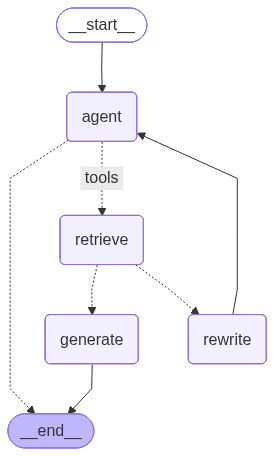

In [24]:
from langgraph.graph import START,END,StateGraph
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Define a new graph

workflow=StateGraph(AgentState)

## Define the nodes we will cycle between

workflow.add_node("agent",agent) ## Agent
retrive=ToolNode([retriever_tool,retriever_tool_langchain])
workflow.add_node("retrieve",retrive) ## Retrival
workflow.add_node("rewrite",rewrite) ## Re-Writing the question
workflow.add_node(
    "generate",generate
) ## Generating  a response after we know the docuemnts are relavant

## Call agent node to decide retrieve or not

workflow.add_edge(START,"agent")
workflow.add_conditional_edges(
    "agent",
    tools_condition,
    {
        ## Translate the condtion output to node in our graph
        "tools":"retrieve",
        END:END,
    },
)

workflow.add_conditional_edges(
    "retrieve",
    ## Assess agent decision
    grade_documents,
)
workflow.add_edge("generate",END)
workflow.add_edge("rewrite","agent")

graph=workflow.compile()

from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png()))


In [29]:
graph.invoke({"messages":"what is vector datbase and how to retrive?"})

--CALL AGENT ---


{'messages': [HumanMessage(content='what is vector datbase and how to retrive?', additional_kwargs={}, response_metadata={}, id='2336cbd4-db07-435f-91e3-49835a17f4c0'),
  AIMessage(content='**What is a Vector Database?**\n\nA vector database is a type of database designed to store and manage high-dimensional vector data, such as embeddings, dense vectors, or other types of numerical representations. These databases are optimized for similarity search, nearest neighbor search, and other operations that involve calculating distances or similarities between vectors.\n\nVector databases are commonly used in various applications, including:\n\n1. **Natural Language Processing (NLP)**: storing word embeddings, sentence embeddings, or document embeddings.\n2. **Computer Vision**: storing image embeddings, feature vectors, or other visual representations.\n3. **Recommendation Systems**: storing user embeddings, item embeddings, or other types of collaborative filtering data.\n4. **Machine Lear